### Data Exploration of the Titanic Dataset from Kaggle

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# get titanic & test csv files as a DataFrame
titanic_train = pd.read_csv("./train.csv" )

# preview the data
titanic_train.head()
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I want to initially see how many null values exist in the data.

In [3]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Looking at the data above results, we see that there are a lot of null values in the "Age" category, as well as in "Cabin" and "Embarked". Since we care about the "Age" category, let's substitute the null values with the median value of all "Ages" we have available.

In [4]:
titanic_train["Age"]=titanic_train["Age"].fillna(titanic_train["Age"].median())

As a result, looking at the null values again we observe that none null values exist in the "Age" category.

In [5]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

I think it is worth exploring some ordering in our dataset. How about first we create a new dataframe grouped by gender and see how average values based on gender vary in our dataset.

In [6]:
# Will filter and remove columns we don't care about
titanic_gender_mean_data = titanic_train.drop(['PassengerId','Pclass'], axis=1)
titanic_gender_mean_data.groupby("Sex").mean()

,Survived,Age,SibSp,Parch,Fare
Sex,,,,,
female,0.742038,27.929936,0.694268,0.649682,44.479818
male,0.188908,30.140676,0.429809,0.235702,25.523893


It is very interesting to point out that the survival rate of females was 74% and 19% for males.

I was also very interested in viewing the survival rates and the way the were influenced by the passenger class people were in, while at the same time investigating the average age in each class.

In [7]:
titanic_train.groupby(["Pclass"]).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,36.812130,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.765380,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.932627,0.615071,0.393075,13.675550


Looking at the table above, one can observe that the biggest percentage that survived in a class was in the 1st class, i.e. 63% in 3 significant digits. First class also had the biggest average age at 36 years of age.

We can dive deeper into grouping and see how the passenger class and gender relate to each other. 

In [8]:
titanic_train.groupby(["Pclass","Sex"]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  33.978723  0.553191  0.457447   
       male     455.729508  0.368852  38.995246  0.311475  0.278689   
2      female   443.105263  0.921053  28.703947  0.486842  0.605263   
       male     447.962963  0.157407  30.512315  0.342593  0.222222   
3      female   399.729167  0.500000  23.572917  0.895833  0.798611   
       male     455.515850  0.135447  26.911873  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

Once again, it is observed that the percentage of females that survived at each class was greater than theat of males.

However, I am not quite aware of the actual numbers involved, so instead of taking the means, let's take the counts on all data, grouped as we have already have.

In [9]:
titanic_train.groupby(["Pclass","Sex"]).count()

PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex                                                                    
1      female           94        94    94   94     94     94      94    94   
       male            122       122   122  122    122    122     122   122   
2      female           76        76    76   76     76     76      76    76   
       male            108       108   108  108    108    108     108   108   
3      female          144       144   144  144    144    144     144   144   
       male            347       347   347  347    347    347     347   347   

               Cabin  Embarked  
Pclass Sex                      
1      female     81        92  
       male       95       122  
2      female     10        76  
       male        6       108  
3      female      6       144  
       male        6       347

More males died in each class. It is interesting to note that the Number of Siblings/Spouses Aboard (SibSP) in each row groupping is the same as the number that survived. This could potentially be that couples left the ship together at all passenger classes. 

We could also look into how the Age of different passengers on the ship varied compared to the Fare they paid (or the class in which they were in).

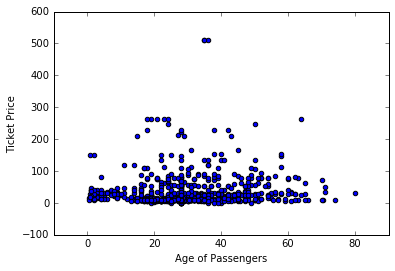

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.scatter(titanic_train.Age, titanic_train.Fare)
plt.xlabel('Age of Passengers')
plt.ylabel('Ticket Price')
plt.show()


Interestingly enough, we observe some outliers at the age of around 40 years of age that paid a ticket almost double in amount compared to others. Looking into the passenger class and age however, we observe the following.

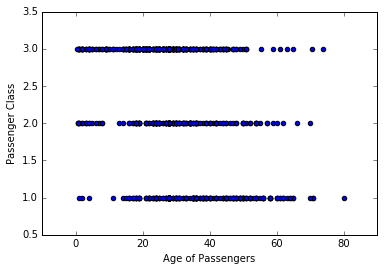

In [15]:
plt.scatter(titanic_train.Age, titanic_train.Pclass)
plt.xlabel('Age of Passengers')
plt.ylabel('Passenger Class')
plt.show()


Looking at the age of passengers and class arrangement, no real information can be gathered other than just the fact that the mean age of a passenger as shown above is around the 30 year mark.

Let's now look at the survival rates into more detail

In [40]:
import thinkstats2
import thinkplot

# Group male and female
men = titanic_train[titanic_train.Sex == 'male']
women = titanic_train[titanic_train.Sex == 'female']

# See percentages of survival
print 'Percentage of men who survived', (float(len(men[men.Survived == 1]))/len(men)) * 100
print 'Percentage of women who survived', (float(len(women[women.Survived == 1]))/len(women))*100

Percentage of men who survived 18.8908145581
Percentage of women who survived 74.2038216561


As we can see above and as it was previously found, the percentage of female that survived is much higher, compared to that of males.

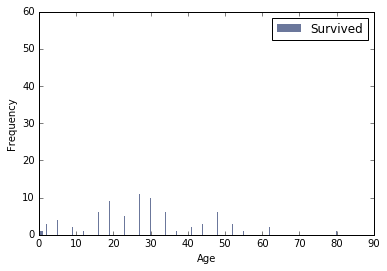

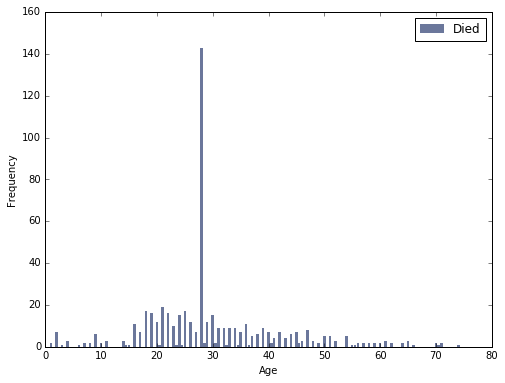

In [44]:
# Survived
survivors = titanic_train[titanic_train.Survived == 1];

# Dead
dead = titanic_train[titanic_train.Survived == 0];

survivors_hist = thinkstats2.Hist(survivors.Age)
dead_hist = thinkstats2.Hist(dead.Age)

thinkplot.Hist(survivors_hist, label='Survived')
thinkplot.Show(xlabel='Age', ylabel='Frequency')

thinkplot.Hist(dead_hist, label='Died')
thinkplot.Show(xlabel='Age', ylabel='Frequency')

We could argue that the people the histogram of the representation of the people that died follows a Gaussian - kind of - distribution with a peak at the 28 year line. It seems weird to me why such a peak exists at that point.